![Explanation for you <3](https://s3.us-east-2.amazonaws.com/journeynorth.org/images/graphics/mclass/Lat_Long.gif)

In [42]:
import json
import os
from matplotlib import pyplot as plt
import pandas as pd


In [43]:

# open all.json Update the image list from nasa
# os.system("wget -r https://epic.gsfc.nasa.gov/api/enhanced/all")
# os.rename("epic.gsfc.nasa.gov/api/enhanced/all", "epic.gsfc.nasa.gov/api/enhanced/all.json")


In [44]:

def contruct_date_list(): 
    dates = []
    with open("epic.gsfc.nasa.gov/api/enhanced/all.json") as f:
        data = json.load(f)
        for d in data:
            dates.append(d["date"])
    return dates

dates = contruct_date_list()
            
image_folders = []
# construct all image folder urls
for d in dates:
    image_folders.append(f"https://epic.gsfc.nasa.gov/api/enhanced/date/{d}")
print(len(image_folders))
print(len(dates))
print(image_folders[0])


13044
13044
https://epic.gsfc.nasa.gov/api/enhanced/date/2025-01-30


In [45]:
# PLEASE REMOVE DUPLICATES !!!!!111!!!11!1!1! Danger Below
# make all image folders
''' os.system("mkdir images")
for i in range(len(dates)):
    os.system(f"mkdir images/{dates[i]}")
    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")
    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '''


' os.system("mkdir images")\nfor i in range(len(dates)):\n    os.system(f"mkdir images/{dates[i]}")\n    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")\n    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '

In [46]:
folders = os.listdir("images")
folders.sort()
if ".DS_Store" in folders:
    folders.remove(".DS_Store")
len(folders)
for i in range(len(folders)):
    os.system(f"cp images/{folders[i]}/{folders[i]}.json combined")


In [47]:
files = os.listdir("combined")
if ".DS_Store" in files:
    files.remove(".DS_Store")

In [48]:
lat_coordinates = []
lon_coordinates = []
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])

        

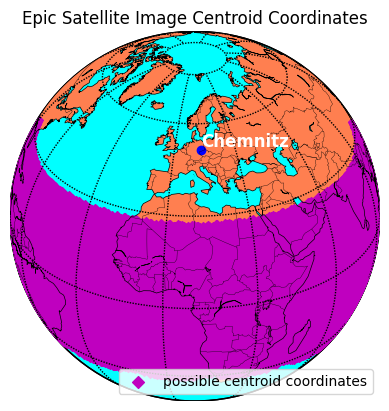

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# set up orthographic map projection with
# perspective of satellite looking down at 45N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho', lat_0=30, lon_0=10, resolution='c')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# Plot lon and lat coordinates on the map. Somehow its lon first and then lat
x, y = map(lon_coordinates, lat_coordinates)
map.scatter(x, y, marker='D', color='m', label="possible centroid coordinates")

p, q = map(12.916667, 50.833332)
map.scatter(p, q, marker="o", color="b")

# Add label for the point p, q
plt.text(p, q, "Chemnitz", fontsize=12, ha='left', va='bottom', color='white', weight="bold")

# plot labels
plt.title("Epic Satellite Image Centroid Coordinates")
plt.legend()
plt.show()


In [50]:
df_lat = pd.DataFrame(lat_coordinates)
df_lon = pd.DataFrame(lon_coordinates)
print("lat describe: ")
print(df_lat.describe())
print("---------------")
print("lon describe: ")
print(df_lon.describe())

lat describe: 
                  0
count  39359.000000
mean       4.399146
std       16.958279
min      -29.274902
25%       -9.228516
50%        8.811035
75%       19.519043
max       26.770020
---------------
lon describe: 
                  0
count  39359.000000
mean       3.941364
std      101.847247
min     -179.963379
25%      -83.803711
50%        5.866699
75%       91.567383
max      180.000000


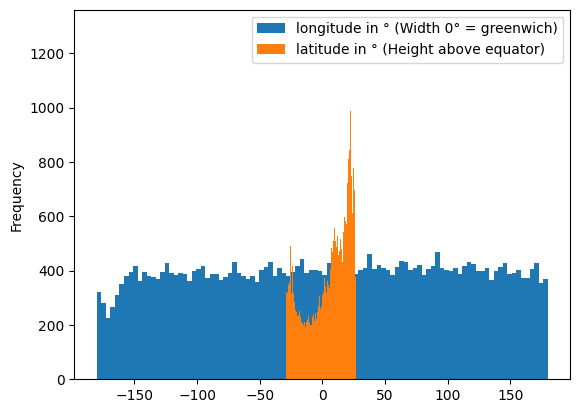

In [51]:
# make distribution of lat and lon
plt.hist(lon_coordinates, bins=100, label="longitude in ° (Width 0° = greenwich)")
plt.ylabel("Frequency")
plt.hist(lat_coordinates, bins=100, label="latitude in ° (Height above equator)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [52]:
import time
import datetime
import json
import os
import random
import numpy as np
import webbrowser
from PIL import Image
import matplotlib.pyplot as plt
from rich.progress import track
import subprocess
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchinfo import summary
from torch.utils.tensorboard import SummaryWriter

In [53]:
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            # print(data[p]["image"] + ".png")
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])
        for j in range(len(data)):
            image_name = data[j]["image"]
            lat = data[j]["centroid_coordinates"]["lat"]
            lon = data[j]["centroid_coordinates"]["lon"]
            new_image_name = f"{image_name}_{lat}_{lon}.png"
            os.system(f"cp download/earth/{image_name}.png pics_with_coords/all/{new_image_name}")

cp: download/earth/epic_RGB_20160722010436.png: No such file or directory
cp: download/earth/epic_RGB_20160722021004.png: No such file or directory
cp: download/earth/epic_RGB_20160722031532.png: No such file or directory
cp: download/earth/epic_RGB_20160722042059.png: No such file or directory
cp: download/earth/epic_RGB_20160722052627.png: No such file or directory
cp: download/earth/epic_RGB_20160722063154.png: No such file or directory
cp: download/earth/epic_RGB_20160722073722.png: No such file or directory
cp: download/earth/epic_RGB_20160722084249.png: No such file or directory
cp: download/earth/epic_RGB_20160722094817.png: No such file or directory
cp: download/earth/epic_RGB_20160722105344.png: No such file or directory
cp: download/earth/epic_RGB_20160722115912.png: No such file or directory
cp: download/earth/epic_RGB_20160722172628.png: No such file or directory
cp: download/earth/epic_RGB_20160722183156.png: No such file or directory
cp: download/earth/epic_RGB_2016072219

In [54]:
from LocationRegressor import LocationRegressor

trans = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.Grayscale(),
        transforms.ToTensor()
    ])

model = LocationRegressor()
summary(model, input_size=(1, 1, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
LocationRegressor                        [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Conv2d: 2-1                       [1, 64, 64, 64]           640
│    └─MaxPool2d: 2-2                    [1, 64, 16, 16]           --
│    └─ReLU: 2-3                         [1, 64, 16, 16]           --
│    └─Conv2d: 2-4                       [1, 128, 16, 16]          73,856
│    └─MaxPool2d: 2-5                    [1, 128, 4, 4]            --
│    └─ReLU: 2-6                         [1, 128, 4, 4]            --
│    └─Conv2d: 2-7                       [1, 256, 4, 4]            295,168
│    └─MaxPool2d: 2-8                    [1, 256, 1, 1]            --
│    └─ReLU: 2-9                         [1, 256, 1, 1]            --
│    └─Flatten: 2-10                     [1, 256]                  --
│    └─Linear: 2-11                      [1, 2]                    514
Tota

In [55]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

dataset = ImageFolder(root="pics_with_coords", transform=trans)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

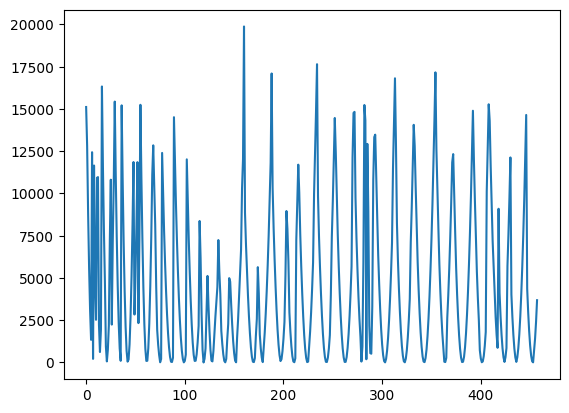

In [ ]:

'''
# Test run to see if the model is working
for x, _ in dataloader:
    print(model(x).detach().numpy())
    # print coords of the image
    data_iter = iter(dataloader)
    data = next(data_iter)

    img = dataset.imgs[0]
    print(img)
    print("lat:", img[0].split("/")[-1].strip(".png").split("_")[-2], "lon:", img[0].split("/")[-1].strip(".png").split("_")[-1])
    break
'''

# 1. Pass image through model
# 2. Get the predicted lat and lon
# 3. Extract the actual lat and lon from the image name
# 4. Calculate the loss between the predicted and actual lat and lon
# 5. Backpropagate the loss
# 6. Update the weights
# 7. Repeat for all images
model = model.to("mps")

# Training loop
for epoch in range(1):
    try:
        for i, (x, _) in enumerate(dataloader):
            try:
                optimizer.zero_grad()
                x = x.to("mps")
                pred = model(x)
                lat = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-2])
                lon = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-1])
                loss = criterion(pred, torch.tensor([lat, lon]).to("mps"))
                loss.backward()
                optimizer.step()
                
                print(loss.item())
            except:
                pass
    except:
        pass       


plt.plot(acc_list)
plt.show()

ValueError: 'lon:' is not a valid value for loc; supported values are 'left', 'center', 'right'

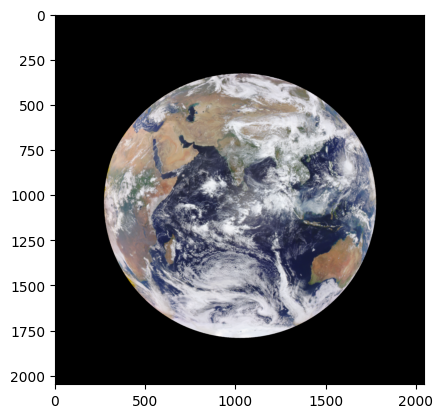

In [ ]:
'''
# Model training
for epoch in range(10):
    for x, _ in dataloader:
        optimizer.zero_grad()
        y_pred = model(x)
        print(y_pred)
'''
# Print image from pics_with_coords/all folder with coordinates
img_coords = os.listdir("pics_with_coords/all")
img = Image.open(f"pics_with_coords/all/{img_coords[0]}")
plt.imshow(img)
plt.title('lat:', img_coords[0].split("/")[-1].strip(".png").split("_")[-2], 'lon:', img_coords[0].split("/")[-1].strip(".png").split("_")[-1])
plt.show()
